In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [2]:
dataset = pd.read_csv("datasets/placement-dataset.csv")
dataset.head(3)

,cgpa,iq,placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0


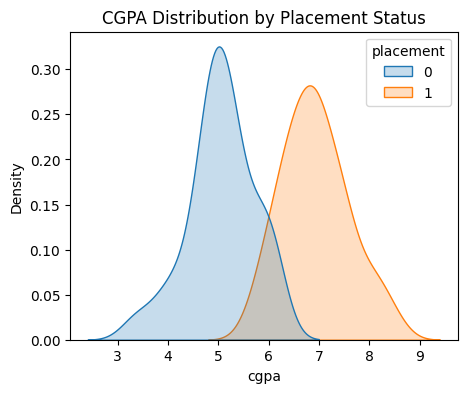

In [3]:
plt.figure(figsize=(5, 4))
sns.kdeplot(data=dataset, x="cgpa", hue="placement", fill=True) # to show the distribution of CGPA by placement status so that we can see how CGPA varies for students who got placed vs those who did not
plt.title("CGPA Distribution by Placement Status")
plt.show()

<Axes: xlabel='cgpa', ylabel='iq'>

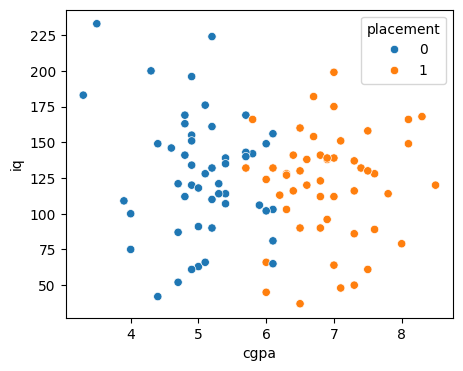

In [4]:
plt.figure(figsize=(5, 4))
sns.scatterplot(x = "cgpa", y = "iq", hue = "placement", data = dataset)

In [5]:
x = dataset.iloc[:, :-1]
y = dataset["placement"]

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [7]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

## Applying GaussianNB

In [8]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [9]:
gnb.score(x_test, y_test)*100, gnb.score(x_train, y_train)*100

(85.0, 91.25)

In [19]:
gnb.predict([[6.8, 123]])

d:\VS Code Files\AIML\ML-Notebook\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1])

d:\VS Code Files\AIML\ML-Notebook\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


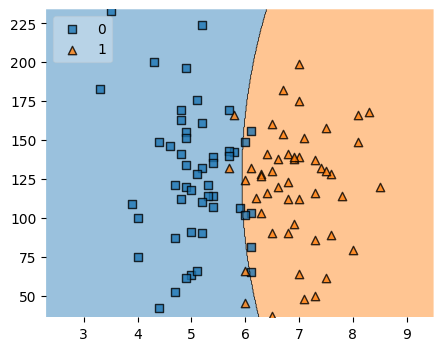

In [10]:
# plotting decision boundaries for GaussianNB
plt.figure(figsize=(5, 4))
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=gnb, legend=2)
plt.show()

## Applying MultinomialNB 

In [11]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

In [12]:
mnb.score(x_test, y_test)*100, mnb.score(x_train, y_train)*100

(95.0, 70.0)

In [20]:
mnb.predict([[6.8, 123]])

d:\VS Code Files\AIML\ML-Notebook\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


array([1])

d:\VS Code Files\AIML\ML-Notebook\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


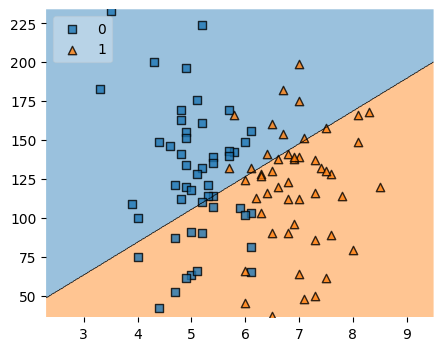

In [13]:
# Plotting decision boundaries for MultinomialNB
plt.figure(figsize=(5, 4))
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=mnb, legend=2)
plt.show()

## Applying BernoulliNB 

In [14]:
bnb = BernoulliNB()
bnb.fit(x_train, y_train) 

BernoulliNB()

In [15]:
bnb.score(x_test, y_test)*100, bnb.score(x_train, y_train)*100

(50.0, 50.0)

In [21]:
bnb.predict([[6.8, 123]])

d:\VS Code Files\AIML\ML-Notebook\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


array([0])

d:\VS Code Files\AIML\ML-Notebook\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


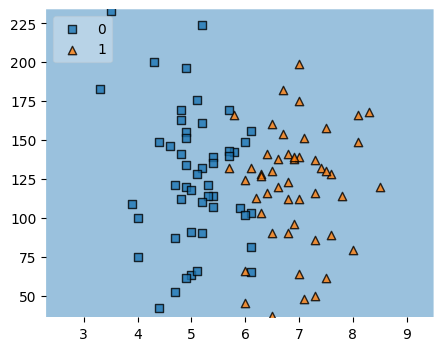

In [16]:
# plotting decision boundaries for BernoulliNB
plt.figure(figsize=(5, 4))
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=bnb, legend=2)
plt.show()